In [12]:
import geodatasets
import geopandas
import pandas as pd

In [8]:

level1_boundary = geopandas.read_file("./Datasets/Shape files/ken_adm_iebc_20191031_shp/ken_admbnda_adm1_iebc_20191031.shp")

total_county_area = level1_boundary[['ADM1_EN','Shape_Area']]

In [7]:
forests_gdf = geopandas.read_file("./Datasets/Shape files/ke_forests/ke_forests.shp")
forests_gdf[['FRID','FOREST']].drop_duplicates().sort_values('FRID')

,FRID,FOREST
2273,FR-1,Multilayered trees (broadleaved evergreen)
3779,FR-10,Mangrove (Trees)
1,FR-2,Closed trees
27,FR-3,Open trees (65-40% crown cover)
4,FR-4,Very open trees (40-15% crown cover)
22,FR-5,Closed to open woody vegetation (thicket)
74,FR-6,Closed shrubs
3,FR-7,Open shrubs (45-40% crown cover)
0,FR-8,Open low shrubs (65-40% crown cover)
16,FR-9,Closed trees on temporarily flooded land


In [16]:

total_forest_overlap = level1_boundary.overlay(forests_gdf, how='intersection')
total_forest_overlap['total_forest_area']=total_forest_overlap.area
total_forest = total_forest_overlap[['ADM1_EN','total_forest_area']].groupby('ADM1_EN').sum().reset_index()
forest_perf = pd.merge(total_county_area, total_forest, how='left')
forest_perf.loc[pd.isna(forest_perf.total_forest_area),'total_forest_area'] = 0
forest_perf['Percent_forest'] = forest_perf.total_forest_area/forest_perf.Shape_Area

tree_overlap = level1_boundary.overlay(forests_gdf[forests_gdf.FRID.isin(['FR-3','FR-2','FR-1','FR-10','FR-9','FR-4'])], how='intersection')
tree_overlap['total_tree_area']=tree_overlap.area
total_tree = tree_overlap[['ADM1_EN','total_tree_area']].groupby('ADM1_EN').sum().reset_index()
forest_tree_perf = pd.merge(total_county_area, total_tree, how='left')
forest_tree_perf.loc[pd.isna(forest_tree_perf.total_tree_area),'total_tree_area'] = 0
forest_tree_perf['Percent_trees'] = forest_tree_perf.total_tree_area/forest_tree_perf.Shape_Area

shrub_overlap = level1_boundary.overlay(forests_gdf[forests_gdf.FRID.isin(['FR-8','FR-7','FR-1','FR-10','FR-9'])], how='intersection')
shrub_overlap['total_shrub_area']=shrub_overlap.area
total_shrub = shrub_overlap[['ADM1_EN','total_shrub_area']].groupby('ADM1_EN').sum().reset_index()
forest_shrub_perf = pd.merge(total_county_area, total_shrub, how='left')
forest_shrub_perf.loc[pd.isna(forest_shrub_perf.total_shrub_area),'total_shrub_area'] = 0
forest_shrub_perf['Percent_shrub'] = forest_shrub_perf.total_shrub_area/forest_shrub_perf.Shape_Area


forest_shrub_data = pd.merge(forest_tree_perf[['ADM1_EN','Percent_trees']], forest_shrub_perf[['ADM1_EN','Percent_shrub']], how='outer',on='ADM1_EN')

/var/folders/wh/kn94yryj1b35n6692fmfv3dc0000gq/T/ipykernel_10463/2975020768.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_forest_overlap['total_forest_area']=total_forest_overlap.area
/var/folders/wh/kn94yryj1b35n6692fmfv3dc0000gq/T/ipykernel_10463/2975020768.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tree_overlap['total_tree_area']=tree_overlap.area
/var/folders/wh/kn94yryj1b35n6692fmfv3dc0000gq/T/ipykernel_10463/2975020768.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shrub_overlap['total_shrub_area']=shrub_overlap.area


In [18]:
tourism_gdf = geopandas.read_file("./Datasets/Shape files/ke_hotels-lodges-campsites/ke_hotels-lodges-campsites.shp")

In [22]:
tourism_gdf.loc[0,'geometry'].within(level1_boundary.loc[0,'geometry'])

False

In [43]:
points_gdf = tourism_gdf
areas_gdf = level1_boundary
variable = 'hotel_locations'

data_list = pd.DataFrame(columns=['ADM1_EN', variable])
for i,region in enumerate(level1_boundary.geometry):
    counter = 0
    for location in points_gdf.geometry:
        if location.within(region):
            counter+1
    data_list.loc[len(data_list)+1,]= [level1_boundary.loc[i,'ADM1_EN'], counter]

In [44]:
data_list

,ADM1_EN,hotel_locations
1,Baringo,0
2,Bomet,0
3,Bungoma,0
4,Busia,0
5,Elgeyo-Marakwet,0
6,Embu,0
7,Garissa,0
8,Homa Bay,0
9,Isiolo,0
10,Kajiado,0


<AxesSubplot:>

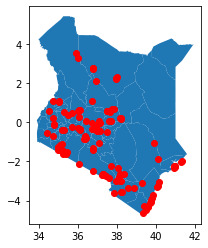

In [42]:
n=level1_boundary.plot()
tourism_gdf.plot(ax=n,color='red')


['Baringo', 0]